In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import torch
from helper import load_fashion_mnist_data, predict_fashion_mnist
from helper import evaluate_accuracy, evaluate_loss
from torch.utils.data import DataLoader
from Softmax import SoftmaxNet

In [9]:
# Input size: 28 (width) * 28 (height) = 784 pixels
num_inputs = 784

# Output size: 10 categories
num_outputs = 10

batch_size = 256
mnist_train, mnist_test = load_fashion_mnist_data(batch_size, resize=None)

In [10]:
smNet = SoftmaxNet(num_inputs, num_outputs, verbose=True)
smNet.initialize(learning_rate=0.15)
smNet.train(mnist_train, 5)

[epoch 1, batch 46] loss: 1.1631451534188313
[epoch 1, batch 92] loss: 0.7408638246681379
[epoch 1, batch 138] loss: 0.673374170842378
[epoch 1, batch 184] loss: 0.6289889942044797
[epoch 1, batch 230] loss: 0.593678227585295
[epoch 2, batch 46] loss: 0.652010167422502
[epoch 2, batch 92] loss: 0.5536509104396986
[epoch 2, batch 138] loss: 0.5399101927228596
[epoch 2, batch 184] loss: 0.5317218938599462
[epoch 2, batch 230] loss: 0.5267386799273284
[epoch 3, batch 46] loss: 0.5864924244258715
[epoch 3, batch 92] loss: 0.5210992071939551
[epoch 3, batch 138] loss: 0.5074706498695456
[epoch 3, batch 184] loss: 0.4955385793810305
[epoch 3, batch 230] loss: 0.49333223700523376
[epoch 4, batch 46] loss: 0.5579761072345402
[epoch 4, batch 92] loss: 0.494087608612102
[epoch 4, batch 138] loss: 0.49277884739896527
[epoch 4, batch 184] loss: 0.4722794961670171
[epoch 4, batch 230] loss: 0.4680794658868209
[epoch 5, batch 46] loss: 0.5542498237412908
[epoch 5, batch 92] loss: 0.4625825570977252


SoftmaxNet(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
  (criterion): CrossEntropyLoss()
)

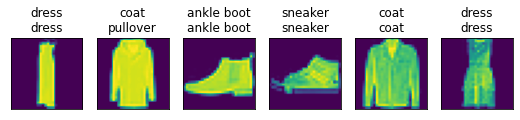

In [11]:
predict_fashion_mnist(smNet, mnist_test)

In [12]:
training_loss = evaluate_loss(smNet, mnist_train)
validation_loss = evaluate_loss(smNet, mnist_test)

print(f"Training Loss ({len(mnist_train.dataset)} samples): \n{training_loss}")
print(f"Validation Loss ({len(mnist_test.dataset)} samples): \n{validation_loss}")

Training Loss (60000 samples): 
0.551783366394043
Validation Loss (10000 samples): 
0.5872845729351044


In [13]:
training_accuracy = evaluate_accuracy(smNet, mnist_train)
validation_accuracy = evaluate_accuracy(smNet, mnist_test)

print(f"Training accuracy ({len(mnist_train.dataset)} samples): \n{training_accuracy}")
print(f"Validation accuracy ({len(mnist_test.dataset)} samples): \n{validation_accuracy}")

Training accuracy (60000 samples): 
0.8032666666666667
Validation accuracy (10000 samples): 
0.7922
